# Goal:
## Explore the Taxis dataset, clean data, perform analysis, and visualize results using NumPy, Pandas, Matplotlib, and Seaborn.

## 1. Why This Project?
1. Learn data cleaning with Pandas — handle missing values.

2. Use NumPy for calculations — mean, median, and percentages.

3. Visualize trends using Matplotlib and Seaborn — histograms, boxplots, scatterplots.

4. Understand relationships between features — e.g., tip amount, total fare, gender, and day.

## 2. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")


## 3. Load Dataset

In [2]:
df = sns.load_dataset('taxis')
df.head()


,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


## 4. Explore Data

In [7]:
print("Shape:", df.shape)
print(df.info())
print(df.isnull().sum())
print(df.describe())


Shape: (6433, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pickup           6433 non-null   object 
 1   dropoff          6433 non-null   object 
 2   passengers       6433 non-null   int64  
 3   distance         6433 non-null   float64
 4   fare             6433 non-null   float64
 5   tip              6433 non-null   float64
 6   tolls            6433 non-null   float64
 7   total            6433 non-null   float64
 8   color            6433 non-null   object 
 9   payment          6389 non-null   object 
 10  pickup_zone      6407 non-null   object 
 11  dropoff_zone     6388 non-null   object 
 12  pickup_borough   6407 non-null   object 
 13  dropoff_borough  6388 non-null   object 
dtypes: float64(5), int64(1), object(8)
memory usage: 703.7+ KB
None
pickup              0
dropoff             0
passengers          0
dist

### Insights:

1. Dataset has ~244 records, 7 features.

2. No missing values — clean dataset.

3. Mix of numerical (tip, total, size) and categorical (sex, smoker, day, time) features.

## 5. Data Cleaning

In [8]:
numeric_cols = ['passengers', 'distance', 'fare', 'tip', 'tolls', 'total']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')



### Insights:

1. Already clean; just ensuring numeric types.

## 6. Analysis with NumPy & Pandas

In [10]:
import numpy as np

# Average values
avg_passengers = np.mean(df['passengers'])
avg_distance = np.mean(df['distance'])
avg_fare = np.mean(df['fare'])
avg_tip = np.mean(df['tip'])
avg_total = np.mean(df['total'])

print("Average Passengers per Trip:", avg_passengers)
print("Average Distance:", avg_distance)
print("Average Fare:", avg_fare)
print("Average Tip:", avg_tip)
print("Average Total:", avg_total)

# Average fare by payment type
fare_by_payment = df.groupby('payment')['fare'].mean()
print("\nAverage Fare by Payment Method:\n", fare_by_payment)

# Average tip by borough (pickup)
tip_by_borough = df.groupby('pickup_borough')['tip'].mean()
print("\nAverage Tip by Pickup Borough:\n", tip_by_borough)

# Number of trips by pickup borough
trips_by_borough = df['pickup_borough'].value_counts()
print("\nNumber of Trips by Pickup Borough:\n", trips_by_borough)


Average Passengers per Trip: 1.539250738380227
Average Distance: 3.0246168195243133
Average Fare: 13.091072594434944
Average Tip: 1.9792196486864553
Average Total: 18.517794186228265

Average Fare by Payment Method:
 payment
cash           11.592991
credit card    13.694750
Name: fare, dtype: float64

Average Tip by Pickup Borough:
 pickup_borough
Bronx        0.148586
Brooklyn     0.966345
Manhattan    1.939550
Queens       3.040061
Name: tip, dtype: float64

Number of Trips by Pickup Borough:
 Manhattan    5268
Queens        657
Brooklyn      383
Bronx          99
Name: pickup_borough, dtype: int64


### Insights:

1. Average fare, tip, and total give an overview of trip costs.

2. Payment method affects average fare (e.g., card vs. cash).

3. Some boroughs have higher tips or more trips — shows traffic/demand patterns.

## 7. Visualization with Matplotlib

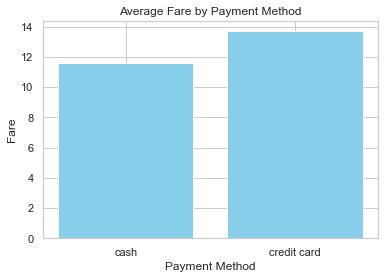

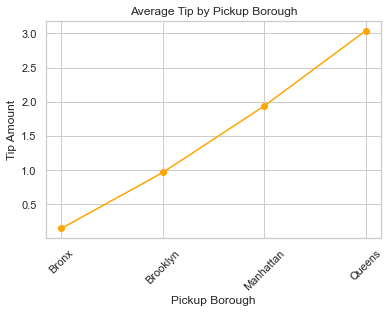

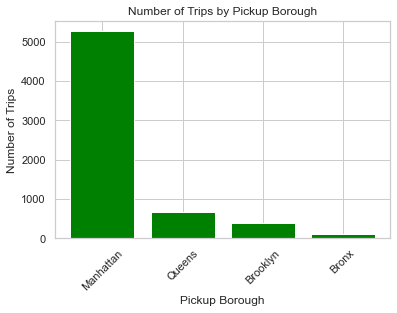

In [11]:
import matplotlib.pyplot as plt

# Bar chart: Average fare by payment
plt.bar(fare_by_payment.index, fare_by_payment.values, color='skyblue')
plt.title("Average Fare by Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Fare")
plt.show()

# Line plot: Average tip by pickup borough
plt.plot(tip_by_borough.index, tip_by_borough.values, marker='o', color='orange')
plt.title("Average Tip by Pickup Borough")
plt.xlabel("Pickup Borough")
plt.ylabel("Tip Amount")
plt.xticks(rotation=45)
plt.show()

# Bar chart: Number of trips per borough
plt.bar(trips_by_borough.index, trips_by_borough.values, color='green')
plt.title("Number of Trips by Pickup Borough")
plt.xlabel("Pickup Borough")
plt.ylabel("Number of Trips")
plt.xticks(rotation=45)
plt.show()


### Insights:

1. Trips concentrated in certain boroughs (likely Manhattan, Brooklyn).

2. Card vs cash fares slightly differ.

3. Tips vary across boroughs.



## 8. Visualization with Seaborn

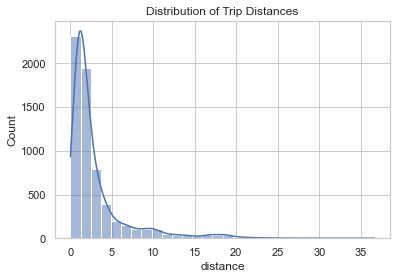

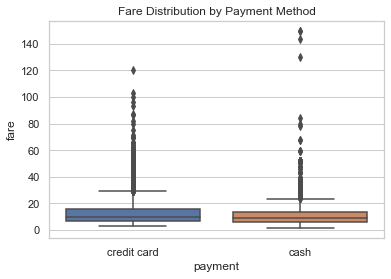

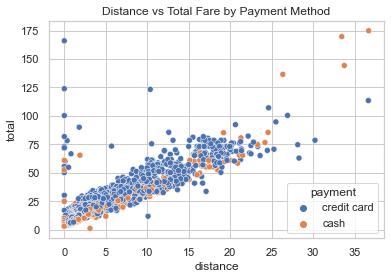

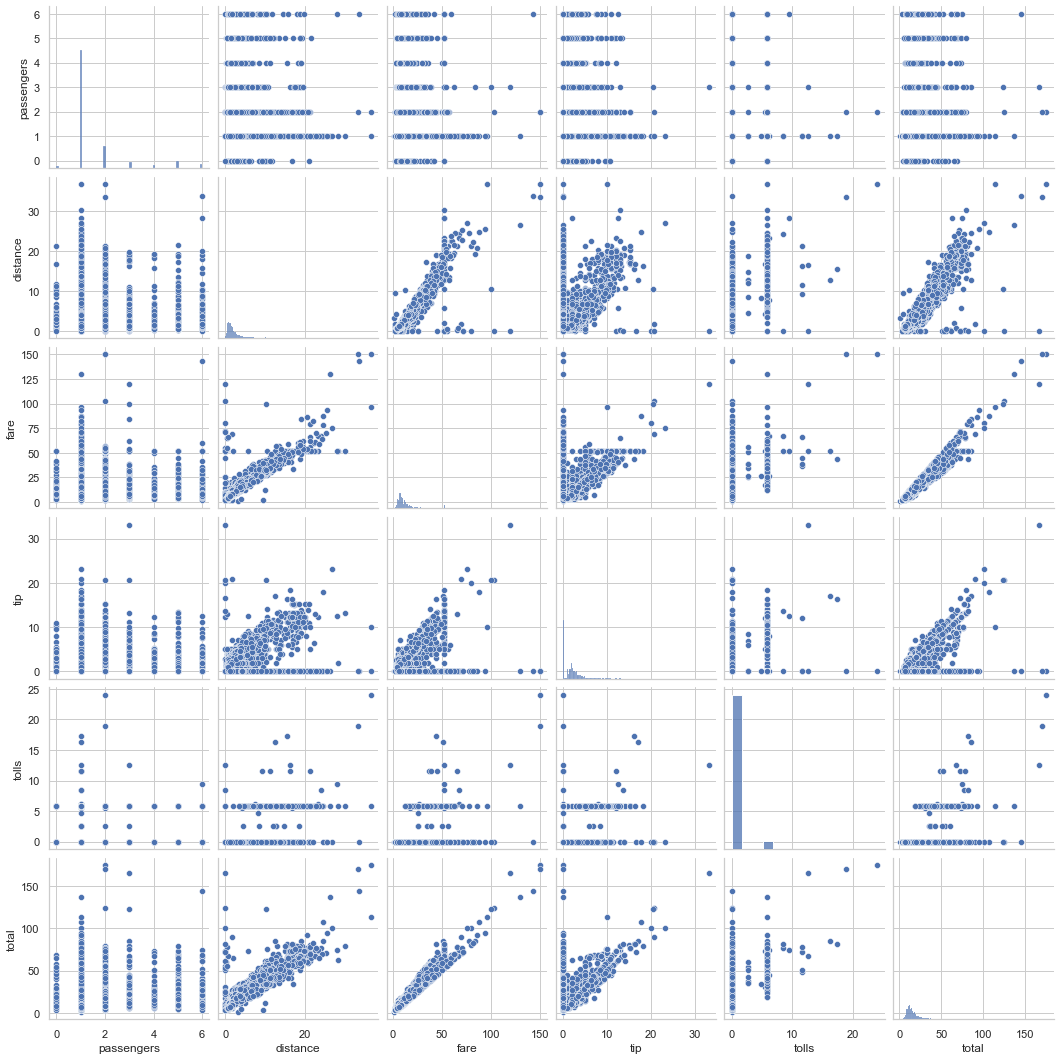

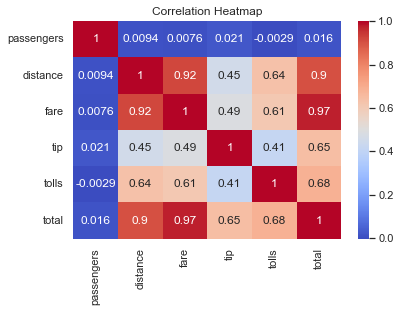

In [12]:
import seaborn as sns
sns.set_theme(style="whitegrid")

# Histogram: Trip Distance
sns.histplot(df['distance'], bins=30, kde=True)
plt.title("Distribution of Trip Distances")
plt.show()

# Boxplot: Fare by Payment Type
sns.boxplot(x='payment', y='fare', data=df)
plt.title("Fare Distribution by Payment Method")
plt.show()

# Scatterplot: Distance vs Total Fare
sns.scatterplot(x='distance', y='total', hue='payment', data=df)
plt.title("Distance vs Total Fare by Payment Method")
plt.show()

# Pairplot of numeric features
sns.pairplot(df[['passengers','distance','fare','tip','tolls','total']], kind='scatter')
plt.show()

# Heatmap of correlations
corr = df[['passengers','distance','fare','tip','tolls','total']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


## Insights:

1. Histogram: most trips are short-distance (<10 miles).

2. Boxplot: card payments show slightly higher fare spread.

3. Scatterplot: total fare increases with distance, with some tips added.

4. Pairplot: helps visualize relationships between distance, fare, tip, and total.

5. Heatmap: total is strongly correlated with fare and distance; tip moderately correlates with fare.